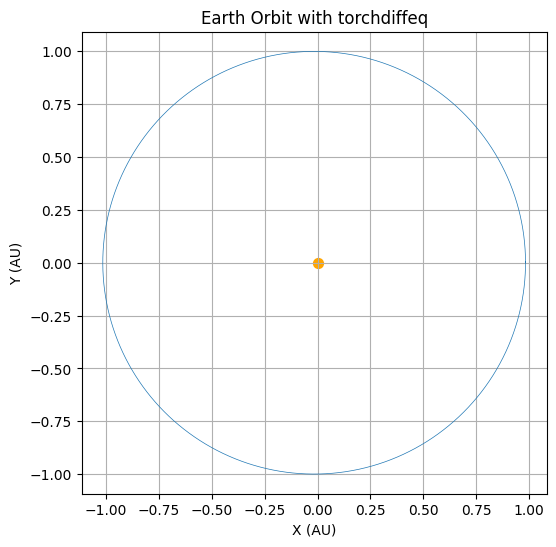

In [2]:
import torch
from torchdiffeq import odeint
import matplotlib.pyplot as plt

# 参数设置 (PyTorch张量)
GM = torch.tensor(4 * (3.1416**2))  # 引力常数
y0 = torch.tensor([0.9833, 0.0, 0.0, 6.387])  # [x, y, vx, vy]
t = torch.linspace(0, 1, 1000)  # 模拟1年，1000个时间点

# 定义微分方程
def orbit_dynamics(t, state):
    x, y, vx, vy = state
    r = torch.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return torch.stack([vx, vy, ax, ay])

# 用GPU加速计算 (可选)
if torch.cuda.is_available():
    y0 = y0.cuda()
    t = t.cuda()

# 求解轨道
trajectory = odeint(orbit_dynamics, y0, t, method='dopri5')

# 转换为numpy并绘图
if trajectory.is_cuda:
    trajectory = trajectory.cpu()
x = trajectory[:,0].detach().numpy()
y = trajectory[:,1].detach().numpy()

plt.figure(figsize=(6,6))
plt.plot(x, y, linewidth=0.5)
plt.scatter(0, 0, c='orange', s=50)  # 太阳位置
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.title('Earth Orbit with torchdiffeq')
plt.axis('equal')
plt.grid()
plt.show()
